<a href="https://colab.research.google.com/github/jayeshhh04/Electricity-usage-prediction/blob/main/electricity_usage_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install scikit-learn
!pip install seaborn
!pip install sklearn
!pip install --upgrade pip
!pip install apto

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import sklearn.preprocessing
%matplotlib inline

In [9]:
df = pd.read_csv("/content/AEP_hourly.csv")
print("="*50)
print

<function print>

In [10]:
df = pd.read_csv("/content/AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")
print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")
print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")
print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")


First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



In [11]:
dataset = df.copy()
dataset["Datetime"] = pd.to_datetime(dataset["Datetime"], format="%Y-%m-%d %H:%M:%S", errors='coerce')
dataset.dropna(subset=["Datetime"], inplace=True)  # Remove rows with NaT in the Datetime column
dataset["Month"] = dataset["Datetime"].dt.month
dataset["Year"] = dataset["Datetime"].dt.year
dataset["Date"] = dataset["Datetime"].dt.date
dataset["Time"] = dataset["Datetime"].dt.time
dataset["Week"] = dataset["Datetime"].dt.isocalendar().week  # Use isocalendar to get the ISO week number
dataset["Day"] = dataset["Datetime"].dt.day_name()
dataset = dataset.set_index("Datetime")
dataset.head(1)


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [12]:
print(dataset["Year"].unique(), "/n")
print("Total Number of Unique Year:", dataset["Year"].nunique(), "/n")


[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] /n
Total Number of Unique Year: 15 /n


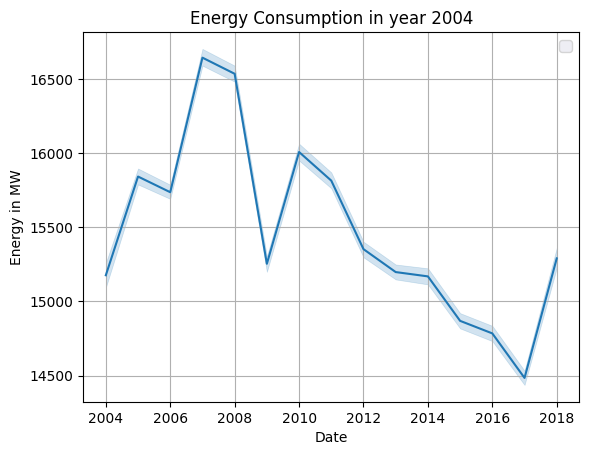

In [13]:
from matplotlib import style

fig = plt.figure()
axl = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={"figure.figsize" :(15,6)})

plt.title("Energy Consumption in year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

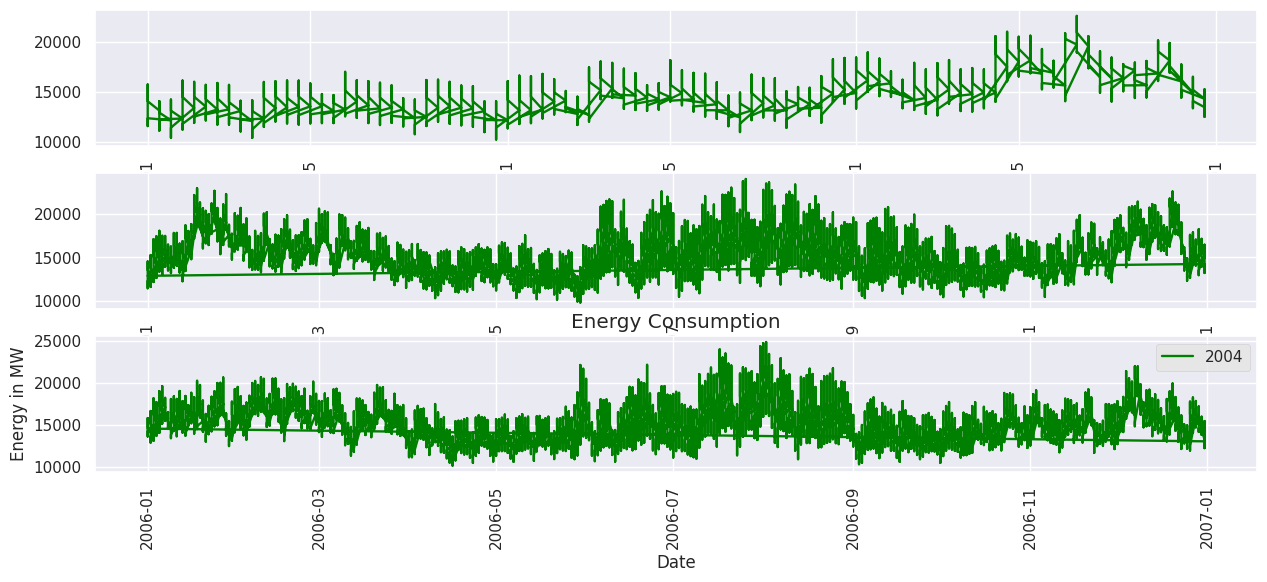

In [14]:
fig = plt.figure()

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

style.use("ggplot")

# Filter data for each year
y_2004 = dataset[dataset["Year"] == 2004]["AEP_MW"].tolist()
x_2004 = dataset[dataset["Year"] == 2004]["Date"].tolist()

y_2005 = dataset[dataset["Year"] == 2005]["AEP_MW"].tolist()
x_2005 = dataset[dataset["Year"] == 2005]["Date"].tolist()

y_2006 = dataset[dataset["Year"] == 2006]["AEP_MW"].tolist()
x_2006 = dataset[dataset["Year"] == 2006]["Date"].tolist()

# Plot data for each year
ax1.plot(x_2004, y_2004, color="green", linewidth=1.7)
ax2.plot(x_2005, y_2005, color="green", linewidth=1.7)
ax3.plot(x_2006, y_2006, color="green", linewidth=1.7)

plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend(["2004", "2005", "2006"])  # Adding legend

for ax in [ax1, ax2, ax3]:
    for label in ax.xaxis.get_ticklabels():
        label.set_rotation(90)


<ipython-input-15-a0e72f35a7ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["AEP_MW"])


Text(0.5, 1.0, 'Energy distribution')

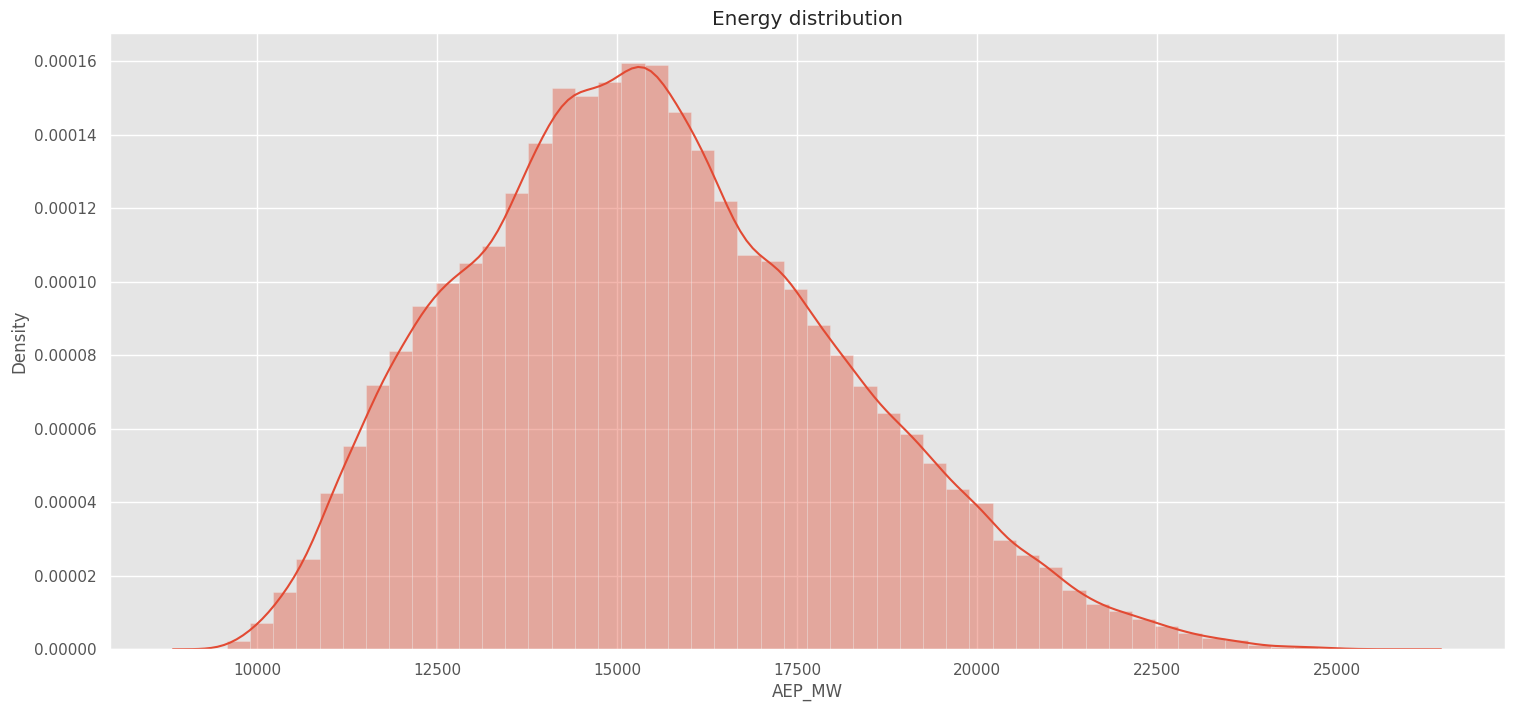

In [15]:
sns.distplot(dataset["AEP_MW"])
plt.title("Energy distribution")

In [16]:
print(dataset.columns)
import datetime
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset["Time"] = dataset["Time"].astype(str)
dataset["Date"] = pd.to_datetime(dataset["Date"])
dataset["Time"] = pd.to_datetime(dataset["Time"])
dataset["DateTime"] = dataset["Date"] + pd.to_timedelta(dataset["Time"].dt.strftime("%H:%M:%S"))

import pandas as pd

dataset['Date'] = dataset['Date'].dt.strftime('%H:%M:%S')

dataset['Time'] = dataset['Time'].dt.strftime('%H:%M:%S')

dataset['DateTime'] = dataset['Date'] + ' ' + dataset['Time']

Index(['AEP_MW', 'Month', 'Year', 'Date', 'Time', 'Week', 'Day'], dtype='object')


<ipython-input-16-2563988a485b>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset["Time"] = pd.to_datetime(dataset["Time"])


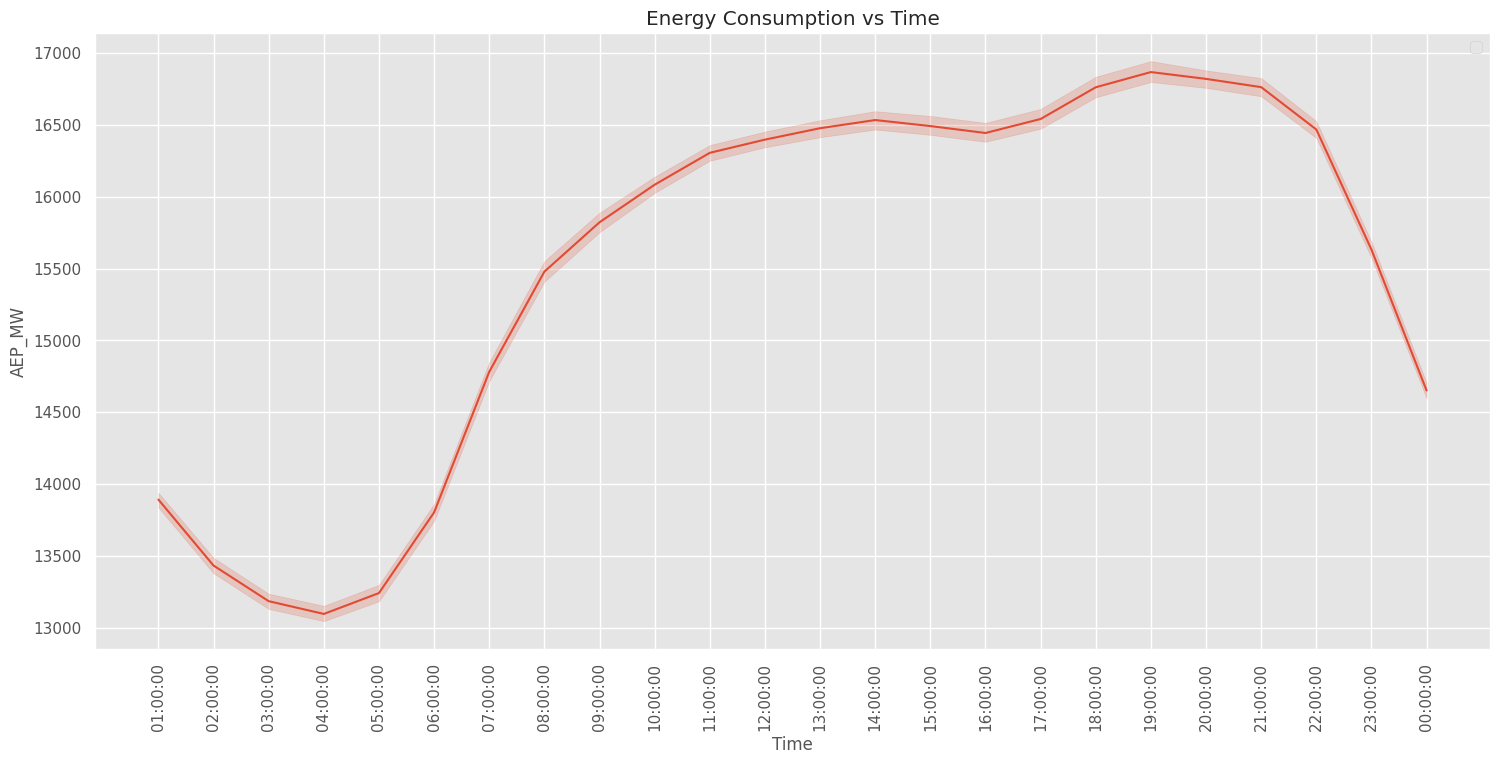

In [17]:
fig = plt.figure()
axl = fig.add_subplot(111)

sns.lineplot(x=dataset['Time'], y=dataset['AEP_MW'], data=df)
plt.title('Energy Consumption vs Time')
plt.xlabel('Time')
plt.grid(True, alpha=1)
plt.legend()

for label in axl.xaxis.get_ticklabels():
  label.set_rotation(90)

In [18]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Assuming you already have 'dataset' DataFrame prepared as in your code

# # Convert 'Date' and 'Time' columns to datetime
# dataset['Date'] = pd.to_datetime(dataset['Date'])
# dataset['Time'] = pd.to_datetime(dataset['Time'])

# # Combine 'Date' and 'Time' columns into a single 'DateTime' column
# dataset['DateTime'] = dataset['Date'] + pd.to_timedelta(dataset['Time'].dt.strftime("%H:%M:%S"))

# # Plot energy consumption against time
# fig = plt.figure()
# ax = fig.add_subplot(111)

# sns.lineplot(x='DateTime', y='AEP_MW', data=dataset, ax=ax)
# plt.title('Energy Consumption vs Time')
# plt.xlabel('Time')
# plt.ylabel('Energy in MW')
# plt.grid(True)
# plt.xticks(rotation=90)
# plt.legend()

# plt.show()


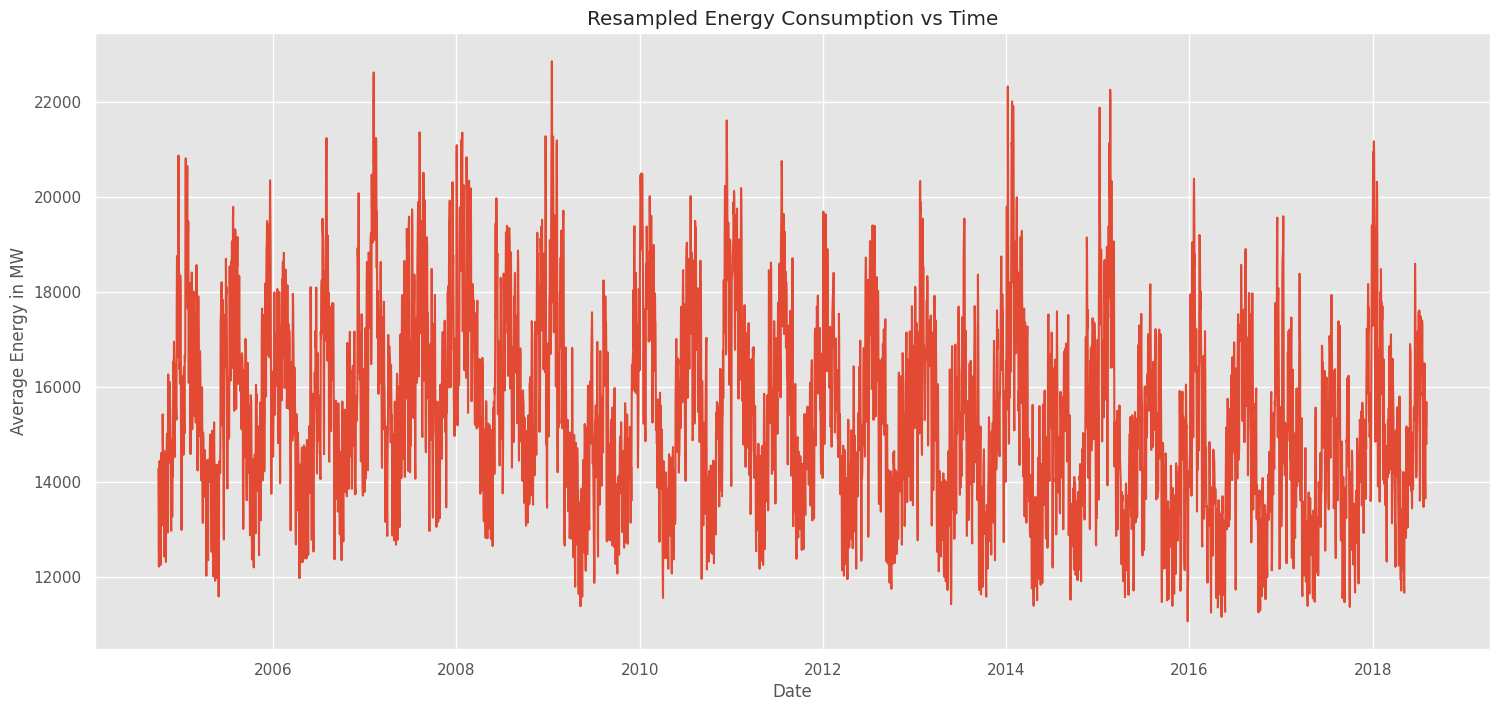

In [19]:
# Only include numeric columns in resampling
numeric_columns = ["AEP_MW", "Month", "Year", "Week"]
NewDataSet = dataset[numeric_columns].resample('D').mean()

# Plot the resampled data
plt.plot(NewDataSet.index, NewDataSet["AEP_MW"])
plt.title('Resampled Energy Consumption vs Time')
plt.xlabel('Date')
plt.ylabel('Average Energy in MW')
plt.grid(True)
plt.show()


In [20]:
print("Old Dataset", dataset.shape)
print("New Dataset", NewDataSet.shape)

Old Dataset (121273, 8)
New Dataset (5055, 4)


In [21]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:, 0:1]

Training_Set = Training_Set[:-60]

In [22]:
print("Training Set Shape", Training_Set.shape)
print("Test Set Shape", TestData.shape)

Training Set Shape (4995, 1)
Test Set Shape (100, 4)


In [23]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

Train = sc.fit_transform(Training_Set)

In [24]:
X_Train = []
Y_Train = []

for i in range(60, Train.shape[0]):

  X_Train.append(Train[i-60:i])

  Y_Train.append(Train[i])

X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [25]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1 ))
X_Train.shape

(4935, 60, 1)

In [26]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'rmsprop', loss = 'mean_square_error')

In [27]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [28]:
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')


regressor.fit(X_Train, Y_Train, epochs=20, batch_size=32)


Epoch 1/20
155/155 [==============================] - 27s 121ms/step - loss: 0.0241
Epoch 2/20
155/155 [==============================] - 18s 114ms/step - loss: 0.0196
Epoch 3/20
155/155 [==============================] - 19s 122ms/step - loss: 0.0186
Epoch 4/20
155/155 [==============================] - 20s 127ms/step - loss: 0.0175
Epoch 5/20
155/155 [==============================] - 21s 135ms/step - loss: 0.0169
Epoch 6/20
155/155 [==============================] - 18s 114ms/step - loss: 0.0167
Epoch 7/20
155/155 [==============================] - 19s 123ms/step - loss: 0.0159
Epoch 8/20
155/155 [==============================] - 18s 116ms/step - loss: 0.0157
Epoch 9/20
155/155 [==============================] - 18s 117ms/step - loss: 0.0153
Epoch 10/20
155/155 [==============================] - 18s 118ms/step - loss: 0.0153
Epoch 11/20
155/155 [==============================] - 17s 113ms/step - loss: 0.0150
Epoch 12/20
155/155 [==============================] - 19s 120ms/step - lo

In [29]:
TestData.head(2)

,AEP_MW,Month,Year,Week
Datetime,,,,
2018-04-26,13157.791667,4.0,2018.0,17.0
2018-04-27,12964.000000,4.0,2018.0,17.0


In [30]:
TestData.shape

(100, 4)

In [31]:
NewDataSet.shape

(5055, 4)

In [32]:
df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)


In [33]:
df_Total.shape

(5155, 1)

In [34]:
inputs = df_Total[len(df_Total) - len(TestData) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(50, 160):
  X_test.append(inputs[i-60:i])

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt = predicted_stock_price
dates = TestData.index.to_list()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 [==============================] - 2s 31ms/step


In [35]:
Machine_Df = pd.DataFrame(data={
    "Date": dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMegaWatt":[x[0] for x in Predicted_MegaWatt]
})

In [36]:
Machine_Df

,Date,TrueMegaWatt,PredictedMegaWatt
0,2018-04-26,13157.791667,14910.401367
1,2018-04-27,12964.000000,13793.213867
2,2018-04-28,12237.583333,13788.436523
3,2018-04-29,12156.791667,13291.045898
4,2018-04-30,13443.500000,13241.741211
...,...,...,...
95,2018-07-30,15368.083333,14316.625977
96,2018-07-31,15180.291667,15620.195312
97,2018-08-01,15151.166667,15315.931641
98,2018-08-02,15687.666667,15261.998047


In [39]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt = [x[0] for x in Predicted_MegaWatt]
dates = TestData.index.to_list()

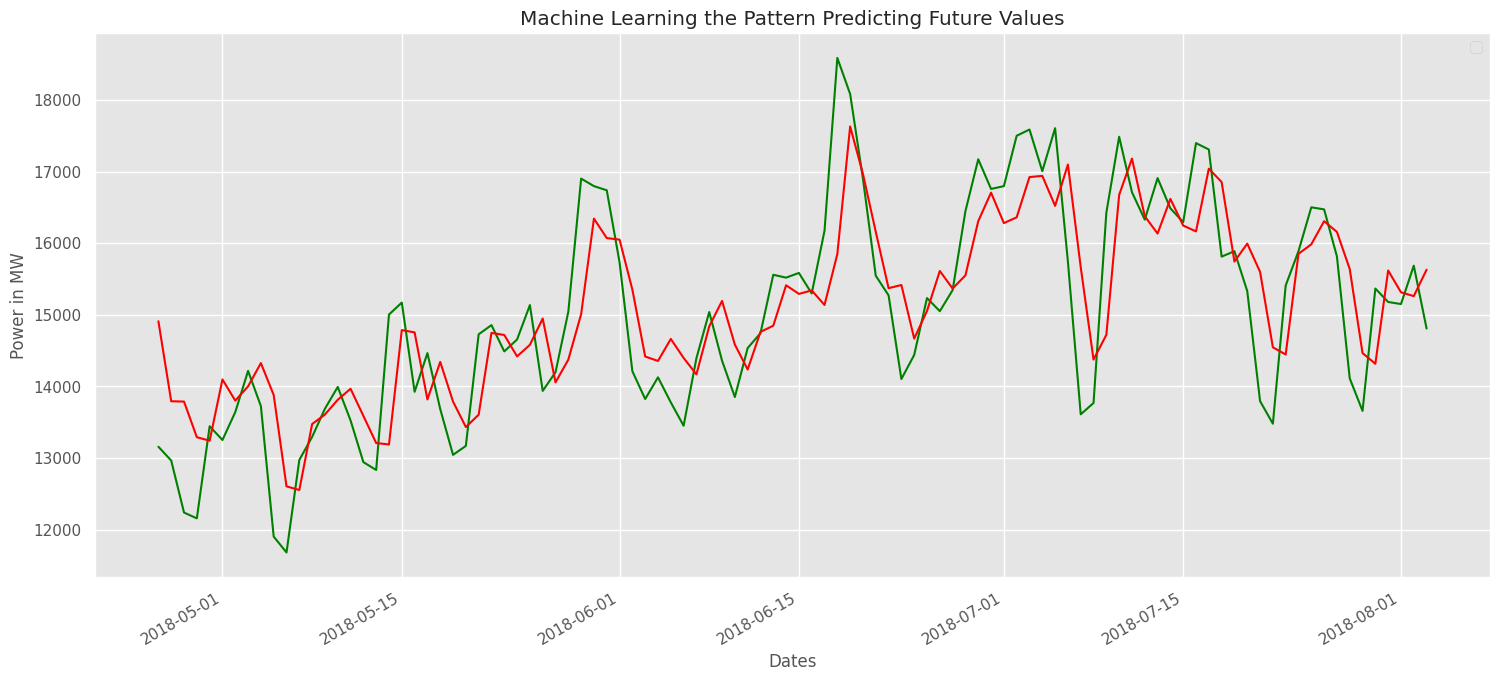

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = dates
y = True_MegaWatt
y1 = Predicted_MegaWatt

plt.plot(x, y, color="green")
plt.plot(x, y1, color="red")

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format x-axis dates
plt.gcf().autofmt_xdate()  # Automatically adjust x-axis dates for better readability

plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learning the Pattern Predicting Future Values")
plt.legend()
plt.show()
